# Gridded Vessel CO2 Emissions and Traffic density 

The gridded vessel emissions and traffic dataset is based on AIS data and CO2 emissions estimates of more than 350 000 vessels from 2020 to present. The data is aggreagated into grids on a monthly basis, and the aggregations are split into vessel categories. 

In [1]:
import odp.geospatial as odp

In [ ]:
gd = odp.GridData()

## Opening the "Vessel CO2 Emissions and Traffic" dataset

In [3]:
ds = gd.open_dataset("Vessel Traffic and CO2 Emissions")
ds

,Array,Chunk
Bytes,6.79 GiB,7.63 MiB
Shape,"(28, 3972, 8194)","(1, 1000, 1000)"
Count,1009 Tasks,1008 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,6.79 GiB,7.63 MiB
Shape,"(28, 3972, 8194)","(1, 1000, 1000)"
Count,1009 Tasks,1008 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


### The data can be sliced in space and time, and will not be retrieved until .compute() is called

In [4]:
ds.sel(
    lon=-5.422721, lat=35.977364, time="2022-01-01", method="nearest"
).hours_total.compute()

<xarray.DataArray 'hours_total' ()>
array(519.)
Coordinates:
    lat      float64 35.97
    lon      float64 -5.427
    time     datetime64[ns] 2022-01-01
Attributes:
    long_name:  hours of vessels in grid cell per month
    units:      hour

## Hours of traffic from fishing vessels in the North Sea

In [5]:
ds_fishing_north_sea = ds.sel(
    lon=slice(-13.337, 9.759),
    lat=slice(50.223, 63.384),
    time=slice("2020-01-01", "2022-01-01"),
).hours_fishing.compute()

In [6]:
# Plot function for gridded maps with coastline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


def plot_emissions(_ds, cmap="inferno"):
    p = _ds.plot.pcolormesh(
        transform=ccrs.PlateCarree(),
        cmap=plt.get_cmap(cmap),
        vmax=_ds.quantile(0.97),
        subplot_kws={"projection": ccrs.Mercator()},
    )
    ax = p.axes
    ax.figure.set_size_inches(24, 12)
    ax.coastlines(color="white")

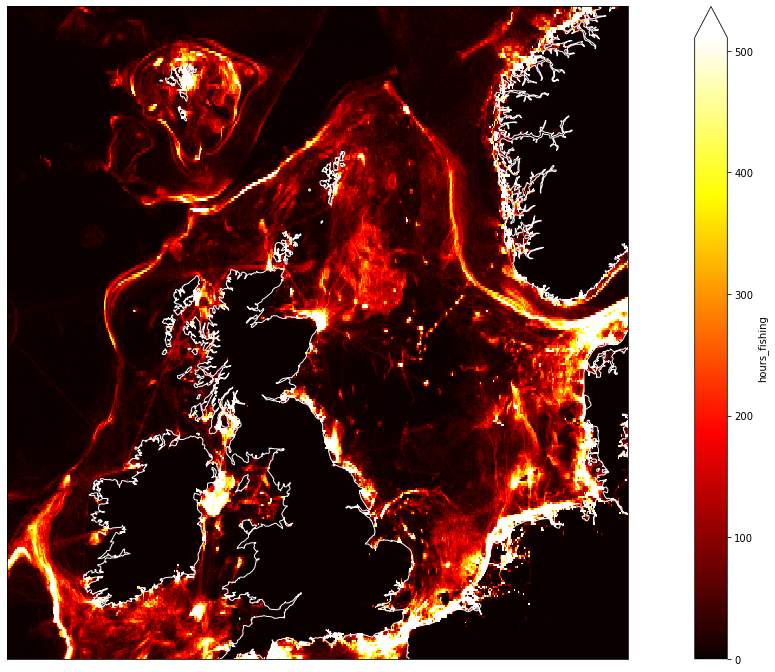

In [7]:
plot_emissions(ds_fishing_north_sea.sum("time"), cmap="hot")

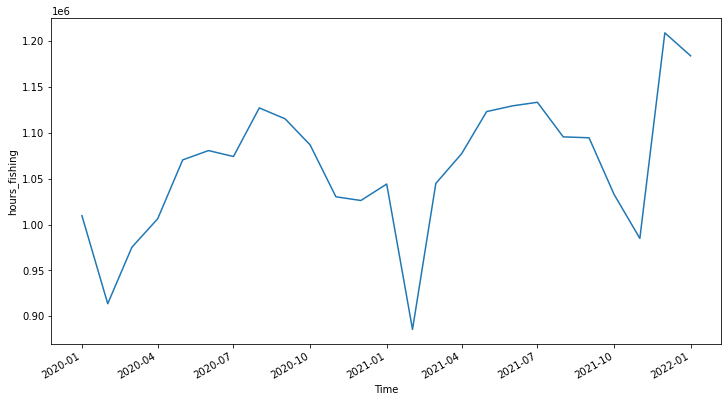

In [8]:
ds_fishing_north_sea.sum(["lon", "lat"]).plot(figsize=(12, 6))

## CO2 Emissions from passenger vessels in Europe

In [9]:
lon0, lat0, lon1, lat1 = (
    -12.67959207,
    30.20434251,
    37.05813440,
    62.46601195,
)  # bounding box
ds_passenger_europe = ds.sel(
    lon=slice(lon0, lon1), lat=slice(lat0, lat1), time=slice("2020-01-01", "2022-01-01")
).co2_passenger.compute()

In [10]:
print(
    f"Total CO2 emissions from passenger vessels in selected area and time period estimated to "
    f"{(ds_passenger_europe.sum(['lon','lat','time']).data/1e6):.1f} mT"
)

Total CO2 emissions from passenger vessels in selected area and time period estimated to 73235959.6 mT


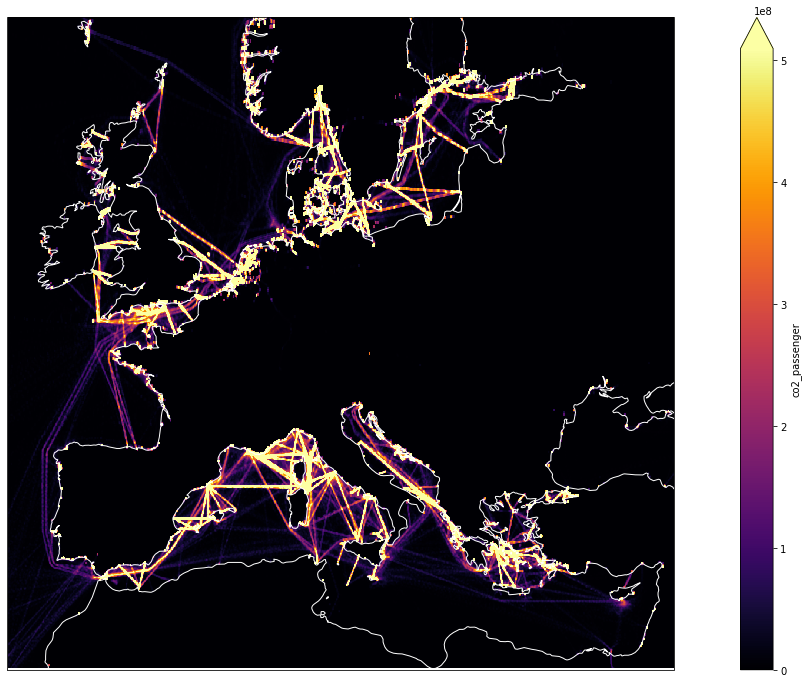

In [11]:
plot_emissions(
    ds_passenger_europe.sum("time").rolling(lat=3, lon=3).mean(), cmap="inferno"
)

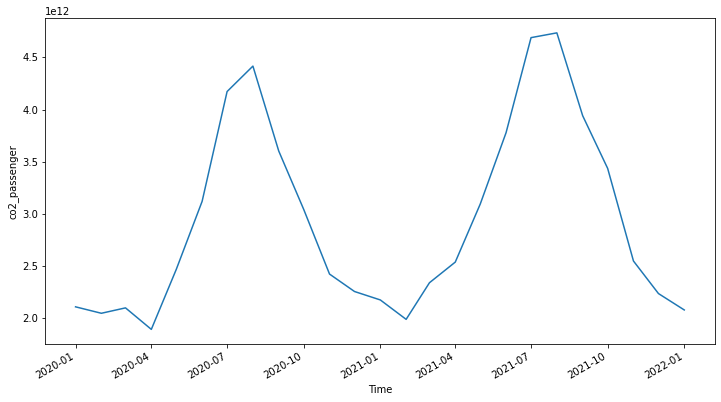

In [12]:
ds_passenger_europe.sum(["lon", "lat"]).plot(figsize=(12, 6))

## CO2 Emissions from cargo vessels in South East Asia

In [13]:
lon0, lat0, lon1, lat1 = 81.39273367, -25.20783174, 147.93180418, 44.22364785
ds_cargo_se_asia = ds.sel(
    lon=slice(lon0, lon1), lat=slice(lat0, lat1), time=slice("2020-01-01", "2022-01-01")
).co2_cargo.compute()

In [14]:
print(
    f"Total CO2 emissions from passenger vessels in selected area and time period estimated to "
    f"{(ds_cargo_se_asia.sum(['lon','lat','time']).data/1e6):.1f} mT"
)

Total CO2 emissions from passenger vessels in selected area and time period estimated to 424008493.8 mT


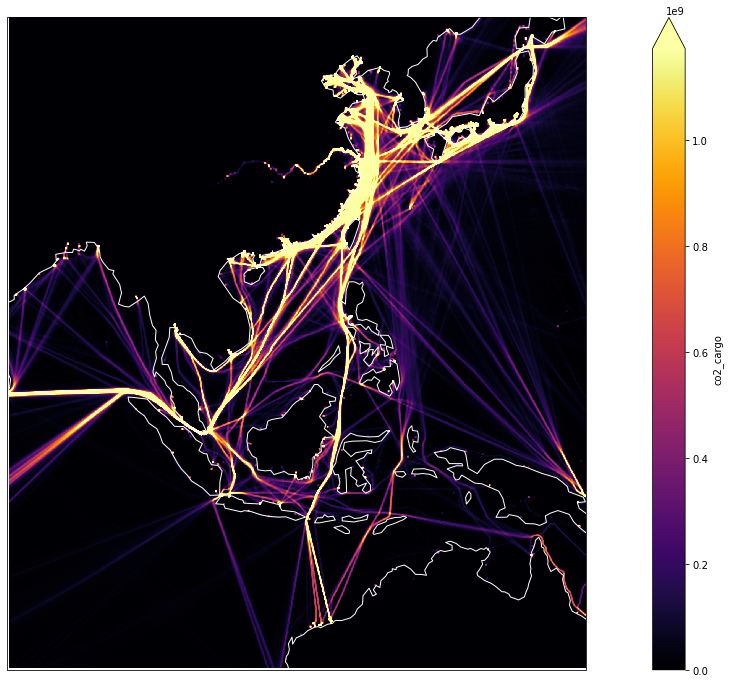

In [15]:
plot_emissions(
    ds_cargo_se_asia.sum("time").rolling(lat=5, lon=5).mean(), cmap="inferno"
)

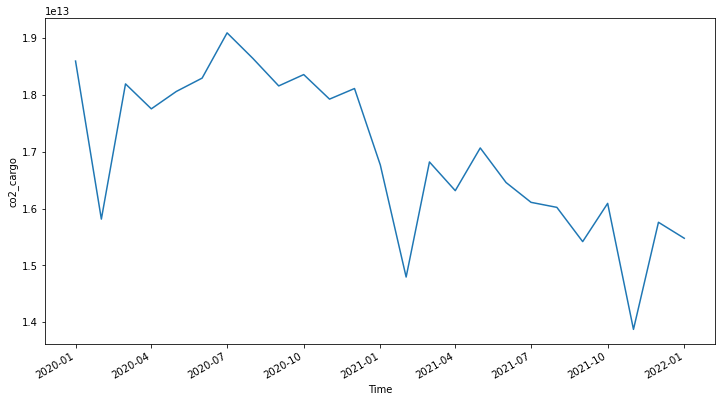

In [16]:
ds_cargo_se_asia.sum(["lon", "lat"]).plot(figsize=(12, 6))

## Total CO2 emission in the world 

In [26]:
%%time
ds_total_co2_2021 = (
    ds.co2_total.sel(time=slice("2021-01-01", "2021-12-31")).sum("time").compute()
)

CPU times: user 2.22 s, sys: 430 ms, total: 2.65 s
Wall time: 6.04 s


In [27]:
co2_total = (ds_total_co2_2021.sum(["lon", "lat"]).data) / 1e6 / 1e6
print(
    f"Total CO2 emissions from maritime vessel traffic in 2021 estimated to {co2_total:.1f} million tonnes"
)

Total CO2 emissions from maritime vessel traffic in 2021 estimated to 924.1 million tonnes


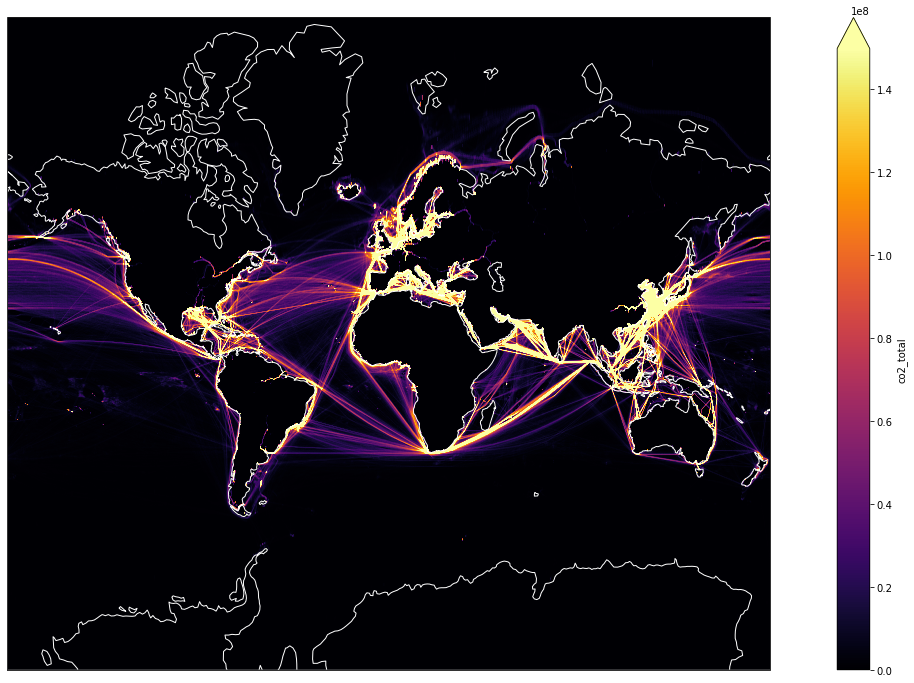

In [28]:
plot_emissions(ds_total_co2_2021.rolling(lat=11, lon=11).mean(), cmap="inferno")

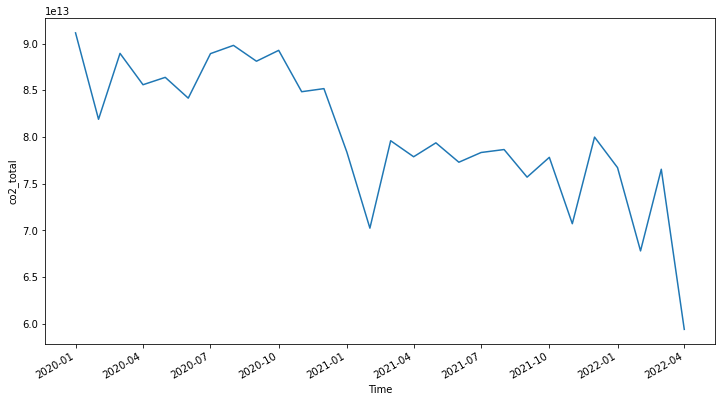

In [29]:
ds.co2_total.sum(["lon", "lat"]).plot(figsize=(12, 6))

In [30]:
ds_total_co2_2020 = (
    ds.co2_total.sel(time=slice("2020-01-01", "2020-12-31")).sum("time").compute()
)

In [31]:
co2_total_2020 = (ds_total_co2_2020.sum(["lon", "lat"]).data) / 1e6 / 1e6
print(
    f"Total CO2 emissions from maritime vessel traffic in 2020 estimated to {co2_total_2020:.1f} million tonnes"
)

Total CO2 emissions from maritime vessel traffic in 2020 estimated to 1044.3 million tonnes
